<a href="https://colab.research.google.com/github/Shambhurajdesai/Project/blob/main/Capstone_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer



In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/store.csv')

In [ ]:
# Dataset First Look
df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Dataset Rows & Columns count
df.shape

(1115, 10)

In [ ]:
df.size

11150

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

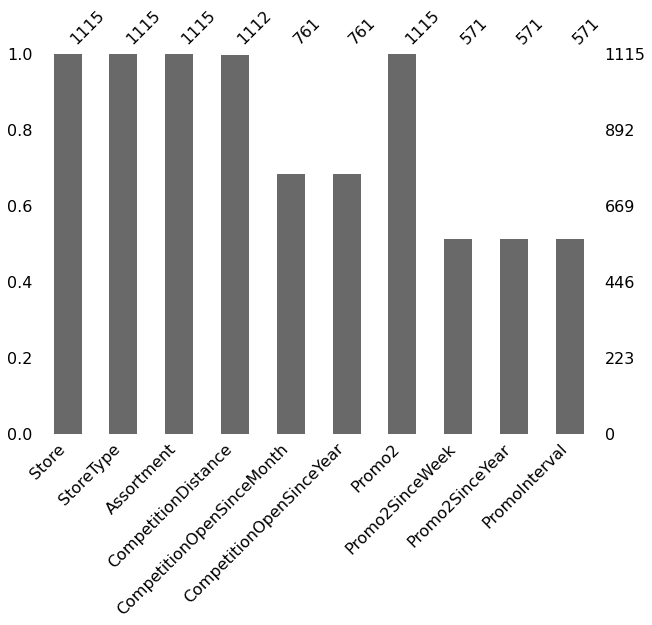

In [ ]:
# Visualizing the missing values
# plt.figure(figsize=(7,7))
# sns.distplot(df.isna().melt(value_name='missing'))
            #  y='variable',
            #  hue='missing',
            #  multiple='fill',
            #  aspect=1.7)
import missingno as msno
msno.bar(df,figsize=(10,7))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


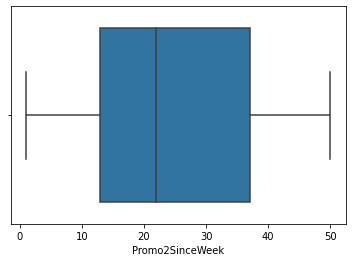

In [ ]:
# box_plot_data=df['CompetitionOpenSinceMonth']
sns.boxplot(df['Promo2SinceWeek'])
plt.show()

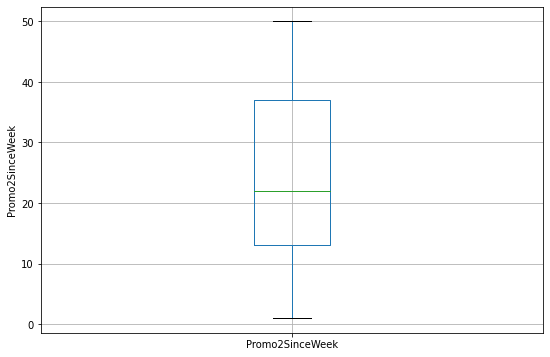

In [ ]:

fig = plt.figure(figsize=(9, 6))
df.boxplot(column = 'Promo2SinceWeek').set_ylabel('Promo2SinceWeek')

plt.show()

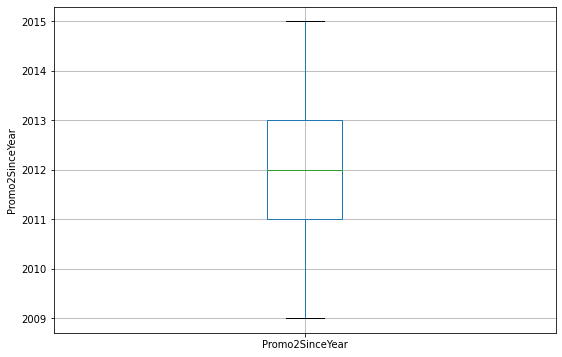

In [ ]:
fig = plt.figure(figsize=(9, 6))
df.boxplot(column = 'Promo2SinceYear').set_ylabel('Promo2SinceYear')

plt.show()

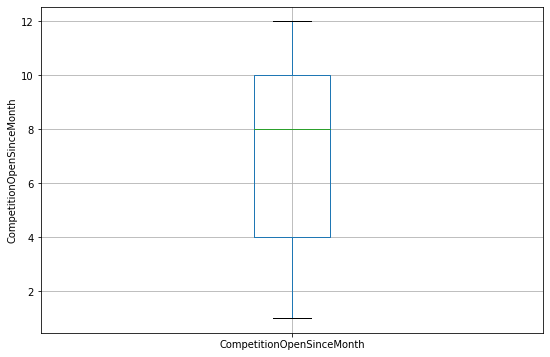

In [ ]:
fig = plt.figure(figsize=(9, 6))
df.boxplot(column = 'CompetitionOpenSinceMonth').set_ylabel('CompetitionOpenSinceMonth')

plt.show()

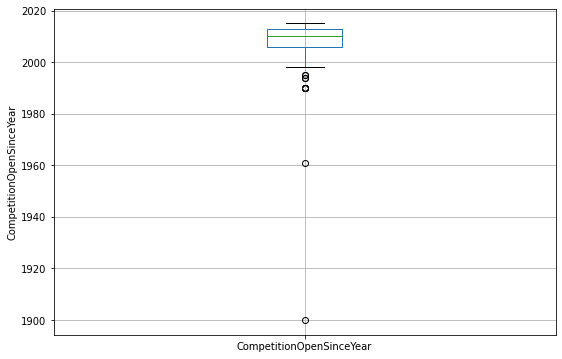

In [ ]:
fig = plt.figure(figsize=(9, 6))
df.boxplot(column = 'CompetitionOpenSinceYear').set_ylabel('CompetitionOpenSinceYear')

plt.show()

In [4]:
df.fillna({'CompetitionDistance':df['CompetitionDistance'].mean(),
           'CompetitionOpenSinceMonth':df['CompetitionOpenSinceMonth'].mean(),
           'CompetitionOpenSinceYear':df['CompetitionOpenSinceYear'].median(),
           'Promo2SinceWeek':df['Promo2SinceWeek'].mean(),
           'Promo2SinceYear':df['Promo2SinceYear'].mean(),
           'PromoInterval':df['PromoInterval'].mode()[0]},inplace=True)

In [5]:
df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

#What did you know about your dataset?



In [ ]:
# Dataset Columns
df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


# Variables Description

ANSWER


In [52]:
# Check Unique Values for each variable.


## 2. Understanding Your Variables

In [ ]:
uniques = {col:df[col].unique() for col in df.columns}

In [ ]:
print(uniques)

{'Store': array([   1,    2,    3, ..., 1113, 1114, 1115]), 'StoreType': array(['c', 'a', 'd', 'b'], dtype=object), 'Assortment': array(['a', 'c', 'b'], dtype=object), 'CompetitionDistance': array([1.270e+03, 5.700e+02, 1.413e+04, 6.200e+02, 2.991e+04, 3.100e+02,
       2.400e+04, 7.520e+03, 2.030e+03, 3.160e+03, 9.600e+02, 1.070e+03,
       1.300e+03, 4.110e+03, 3.270e+03, 5.000e+01, 1.384e+04, 3.240e+03,
       2.340e+03, 5.500e+02, 1.040e+03, 4.060e+03, 4.590e+03, 4.300e+02,
       2.300e+03, 6.000e+01, 1.200e+03, 2.170e+03, 4.000e+01, 9.800e+03,
       2.910e+03, 1.320e+03, 2.240e+03, 7.660e+03, 5.400e+02, 4.230e+03,
       1.090e+03, 2.600e+02, 1.800e+02, 1.180e+03, 2.900e+02, 4.880e+03,
       9.710e+03, 2.700e+02, 1.060e+03, 1.801e+04, 6.260e+03, 1.057e+04,
       4.500e+02, 3.036e+04, 7.170e+03, 7.200e+02, 6.620e+03, 4.200e+02,
       7.340e+03, 2.840e+03, 5.540e+03, 3.500e+02, 2.050e+03, 3.700e+03,
       2.256e+04, 4.100e+02, 2.500e+02, 1.130e+03, 4.840e+03, 1.750e+04,
      

# 3. Data Wrangling

In [55]:
df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64


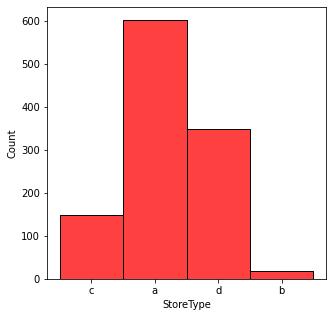

In [69]:
print(df.StoreType.value_counts())
fig = plt.figure(figsize=(5,5))
ax = fig.gca()
sns.histplot(df['StoreType'],color = 'r',legend=True)

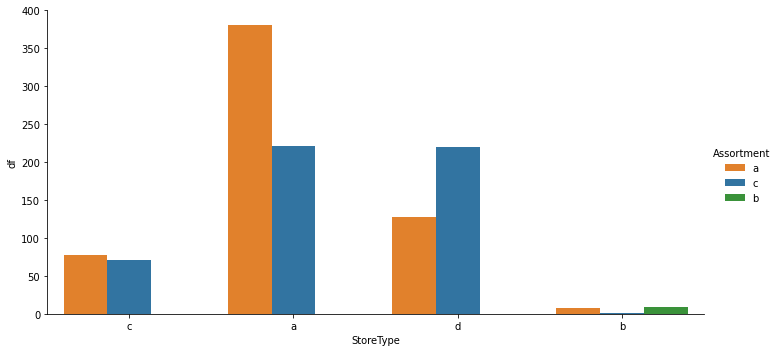

In [86]:
sns.axes_style('whitegrid')
sns.catplot('StoreType',data=df,aspect=2,kind='count',hue='Assortment',
            palette=['C1', 'C0','C2']).set_ylabels('df')

Text(0.5, 1.0, 'Attrition Probability')

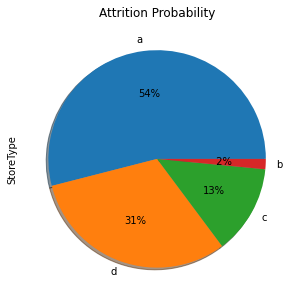

In [93]:
ax = plt.subplots(figsize=(5,5))
ax = df['StoreType'].value_counts(). plot.pie(autopct = '%2.0f%%',shadow=True)
ax.set_title('Attrition Probability')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text major ticklabel objects>)

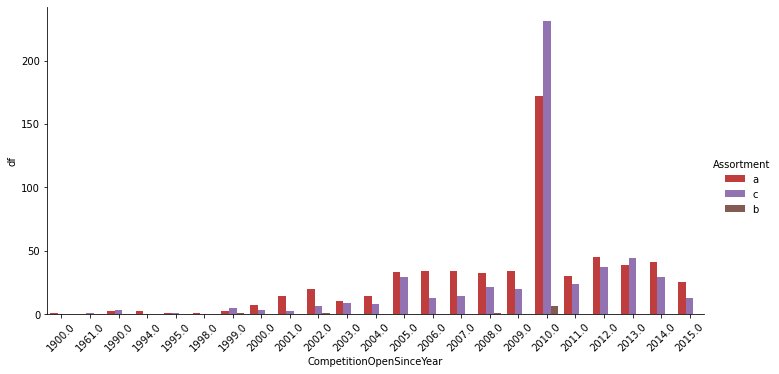

In [98]:
sns.axes_style('whitegrid')
sns.catplot('CompetitionOpenSinceYear',data=df,aspect=2,kind='count',hue='Assortment',
            palette=['C3', 'C4','C5']).set_ylabels('df')
plt.xticks(rotation=45)

In [77]:
df.Assortment

0       a
1       a
2       a
3       c
4       a
       ..
1110    a
1111    c
1112    c
1113    c
1114    c
Name: Assortment, Length: 1115, dtype: object

In [72]:
numeric_features = df.describe().columns
numeric_features

Index(['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear'],
      dtype='object')

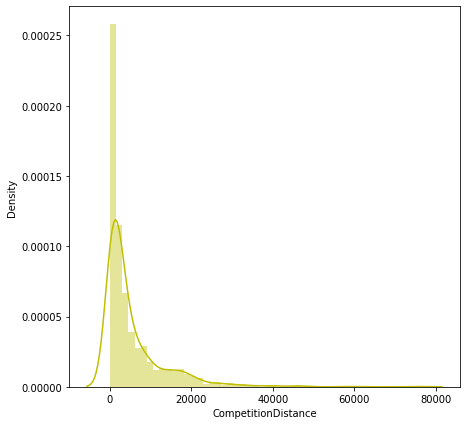

In [32]:
fig = plt.figure(figsize=(7,7))
ax=fig.gca()
sns.distplot(df['CompetitionDistance'],color='y')

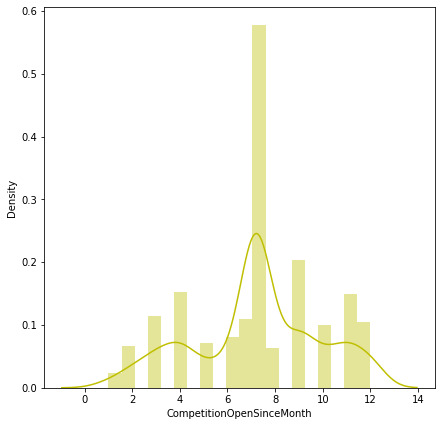

In [33]:
fig = plt.figure(figsize=(7,7))
ax=fig.gca()
sns.distplot(df['CompetitionOpenSinceMonth'],color='y')

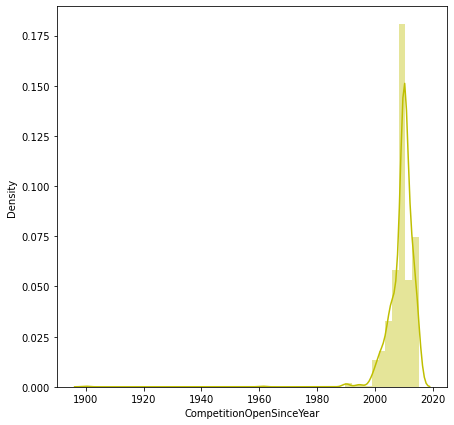

In [34]:
fig = plt.figure(figsize=(7,7))
ax=fig.gca()
sns.distplot(df['CompetitionOpenSinceYear'],color='y')

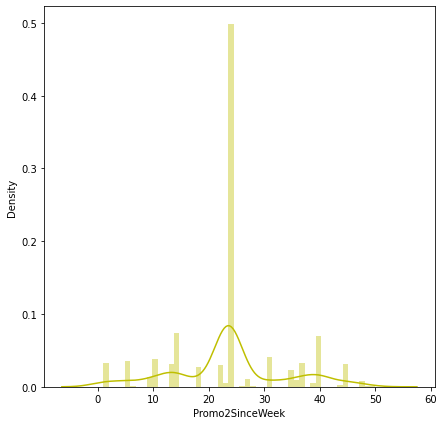

In [36]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
sns.distplot(df['Promo2SinceWeek'],color ='y')

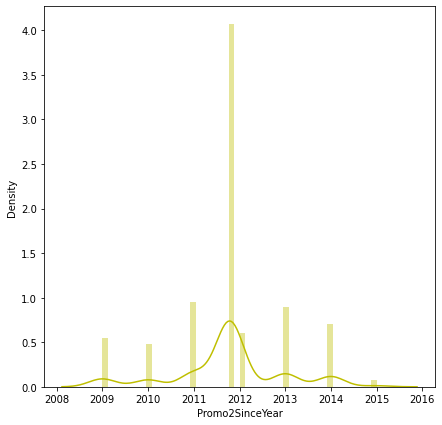

In [37]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
sns.distplot(df['Promo2SinceYear'],color ='y')

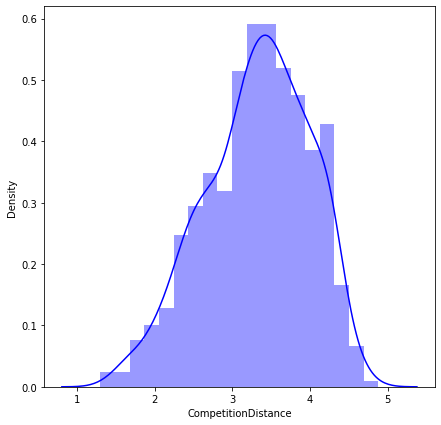

In [42]:
fig = plt.figure(figsize=(7,7))
ax=fig.gca()
sns.distplot(np.log10(df['CompetitionDistance']),color='b')

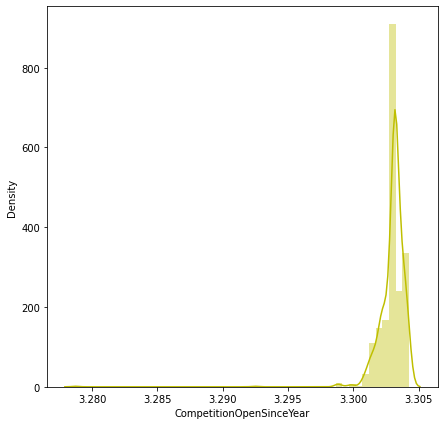

In [43]:
fig = plt.figure(figsize=(7,7))
ax=fig.gca()
sns.distplot(np.log10(df['CompetitionOpenSinceYear']),color='y')

In [51]:
df['CompetitionDistance'].skew()

2.9332236904318894

In [54]:
df.head(4)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
1,2,a,a,570.0,11.0,2007.0,1,13.000000,2010.000000,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.000000,2011.000000,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"


In [ ]:
df.PromoInterval.value_counts()

Jan,Apr,Jul,Oct     879
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [ ]:
# df.Promo2.value_counts().plot('bar',color=('C0','C1')).set_title('Promo2') 

In [ ]:
df['Promo2'].value_counts()

1    571
0    544
Name: Promo2, dtype: int64

In [ ]:
# df['Attrition'].value_counts().plot('bar', color=('C0','C1')).set_title('Attrition')